Исходные данные:
   Age  Experience  Rank Nationality   Go
0   25           1     1          UK  YES
1   30           3     2         USA   NO
2   45          10     3           N  YES
3   35           7     2         USA   NO
4   22           0     1          UK  YES
5   28           2     2           N   NO

Преобразованные данные:
   Age  Experience  Rank  Nationality  Go
0   25           1     1            0   1
1   30           3     2            1   0
2   45          10     3            2   1
3   35           7     2            1   0
4   22           0     1            0   1
5   28           2     2            2   0

Признаки (X):
   Age  Experience  Rank  Nationality
0   25           1     1            0
1   30           3     2            1
2   45          10     3            2
3   35           7     2            1
4   22           0     1            0
5   28           2     2            2

Цель (y):
0    1
1    0
2    1
3    0
4    1
5    0
Name: Go, dtype: int64


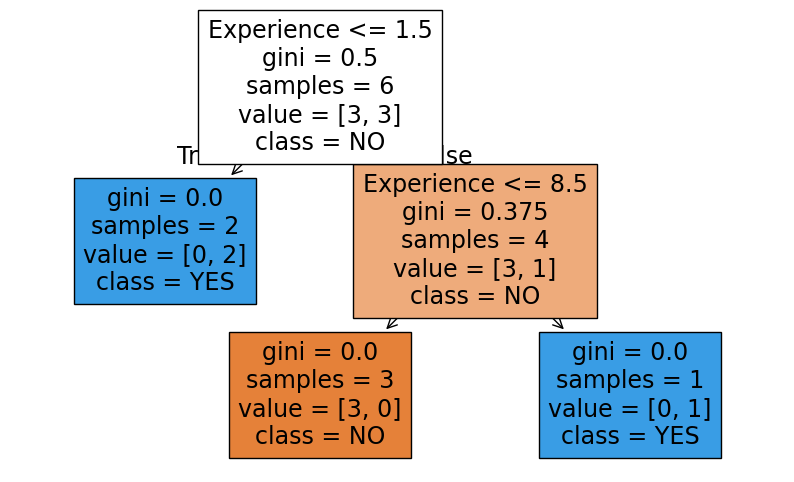

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 🔹 Делаем DataFrame прямо в коде
data = {
    'Age': [25, 30, 45, 35, 22, 28],
    'Experience': [1, 3, 10, 7, 0, 2],
    'Rank': [1, 2, 3, 2, 1, 2],
    'Nationality': ['UK', 'USA', 'N', 'USA', 'UK', 'N'],
    'Go': ['YES', 'NO', 'YES', 'NO', 'YES', 'NO']
}

df = pd.DataFrame(data)
print("Исходные данные:")
print(df)

# 🔹 Преобразуем строковые в числовые
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print("\nПреобразованные данные:")
print(df)

# 🔹 Разделяем признаки и цель
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

print("\nПризнаки (X):")
print(X)
print("\nЦель (y):")
print(y)

# 🔹 Создаём дерево решений с критерием 'gini'
dtree = DecisionTreeClassifier(criterion="gini", random_state=0)
dtree = dtree.fit(X, y)

# 🔹 Отобразим дерево
plt.figure(figsize=(10, 6))
plot_tree(dtree, feature_names=features, class_names=['NO', 'YES'], filled=True)
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text

# Данные
arr = [
    [36,10,9,'UK','NO'],
    [42,12,4,'USA','NO'],
    [23,4,6,'N','NO'],
    [52,4,4,'USA','NO'],
    [43,21,8,'USA','YES'],
    [43,10,7,'N','NO']
]

# Создадим DataFrame
df = pd.DataFrame(arr, columns=["Age", "Experience", "Rank", "Nationality", "Go"])

# Кодируем категориальные значения
df["Nationality"] = df["Nationality"].map({"UK":0, "USA":1, "N":2})
df["Go"] = df["Go"].map({"NO":0, "YES":1})

X = df[["Age", "Experience", "Rank", "Nationality"]]
y = df["Go"]

# ---------------------------
# Функции для энтропии и Gini
# ---------------------------
def entropy(y):
    probs = np.bincount(y) / len(y)
    return -np.sum([p*np.log2(p) for p in probs if p > 0])

def gini(y):
    probs = np.bincount(y) / len(y)
    return 1 - np.sum([p**2 for p in probs])

print("Entropy of target:", entropy(y.values))
print("Gini of target:", gini(y.values))

# ---------------------------
# Decision Tree
# ---------------------------
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X, y)

print("\nDecision Tree (entropy):")
print(export_text(clf, feature_names=list(X.columns)))

clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3)
clf_gini.fit(X, y)

print("\nDecision Tree (gini):")
print(export_text(clf_gini, feature_names=list(X.columns)))


Entropy of target: 0.6500224216483541
Gini of target: 0.2777777777777777

Decision Tree (entropy):
|--- Experience <= 16.50
|   |--- class: 0
|--- Experience >  16.50
|   |--- class: 1


Decision Tree (gini):
|--- Experience <= 16.50
|   |--- class: 0
|--- Experience >  16.50
|   |--- class: 1



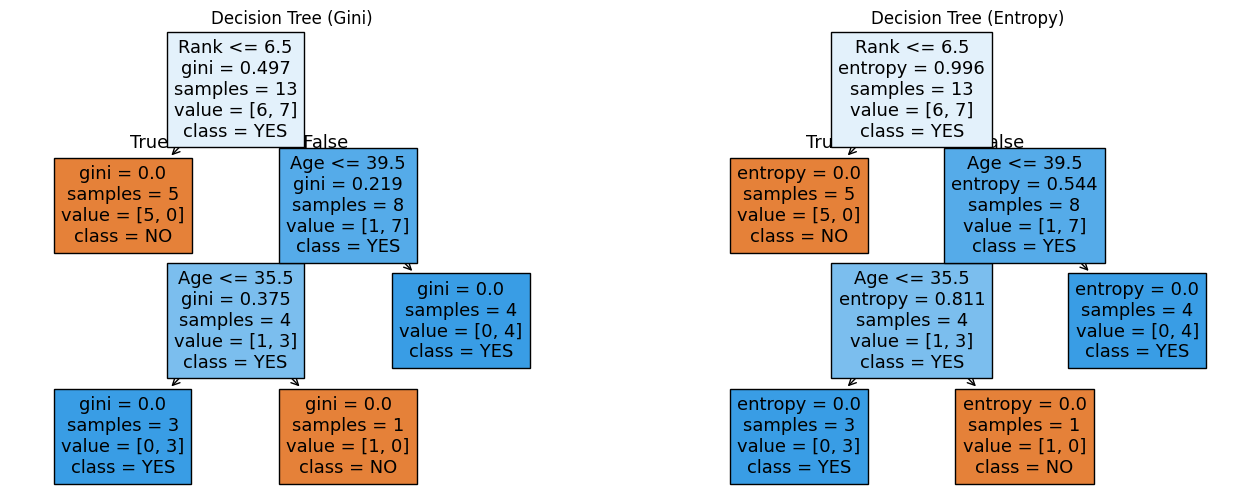

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Данные
data = {
    'Age': [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45],
    'Experience': [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9],
    'Rank': [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9],
    'Nationality': ['UK','USA','N','USA','USA','UK','N','UK','N','N','USA','UK','UK'],
    'Go': ['NO','NO','NO','NO','YES','NO','YES','YES','YES','YES','NO','YES','YES']
}

df = pd.DataFrame(data)

# Преобразуем категориальные данные в числовые
df['Nationality'] = df['Nationality'].astype('category').cat.codes
df['Go'] = df['Go'].map({'NO':0, 'YES':1})

X = df[['Age','Experience','Rank','Nationality']]
y = df['Go']

# Создаем и обучаем дерево с критерием Gini
tree_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_gini.fit(X, y)

# Создаем и обучаем дерево с критерием Entropy
tree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_entropy.fit(X, y)

# Визуализация
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plot_tree(tree_gini, feature_names=X.columns, class_names=['NO','YES'], filled=True)
plt.title('Decision Tree (Gini)')

plt.subplot(1,2,2)
plot_tree(tree_entropy, feature_names=X.columns, class_names=['NO','YES'], filled=True)
plt.title('Decision Tree (Entropy)')

plt.show()